**Project-1**
# Number Plate Detection of Vehicles


In [ ]:
pip install opencv-python numpy pytesseract

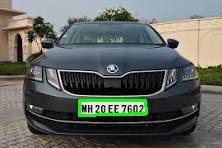

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import the patch

# Load the image
image = cv2.imread("/content/car.jpeg")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5,5), 0)

# Apply edge detection
edges = cv2.Canny(blurred, 50, 200)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Loop through contours to find possible plates
plate_contour = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    if len(approx) == 4:  # Looking for a rectangular contour
        plate_contour = approx
        break

# Draw the contour on the image
if plate_contour is not None:
    cv2.drawContours(image, [plate_contour], -1, (0, 255, 0), 2)

cv2_imshow(image) # Use the patch for displaying instead of cv2.imshow
# Remove cv2.waitKey(0) and cv2.destroyAllWindows() as they are not needed with cv2_imshow
# cv2.waitKey(0)
# cv2.destroyAllWindows()

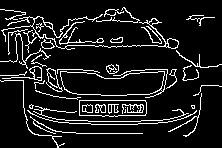

In [5]:
# Load image
image = cv2.imread("/content/car.jpeg")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5,5), 0)

# Perform edge detection
edges = cv2.Canny(blurred, 50, 200)

# Import the necessary function for displaying images in Colab
from google.colab.patches import cv2_imshow

# Display the image using cv2_imshow
cv2_imshow(edges)
# cv2.waitKey(0) # No need for waitKey and destroyAllWindows in Colab with cv2_imshow.
# cv2.destroyAllWindows()

In [6]:
# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Loop through contours to find possible plates
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    if len(approx) == 4:  # Possible number plate has 4 corners
        x, y, w, h = cv2.boundingRect(contour)
        plate = image[y:y+h, x:x+w]
        break

# Import the necessary function for displaying images in Colab
from google.colab.patches import cv2_imshow

# Display the image using cv2_imshow
cv2_imshow(plate)
# cv2.waitKey(0) # No need for waitKey and destroyAllWindows in Colab with cv2_imshow.
# cv2.destroyAllWindows()

**Project-2**
# Brain Tumor Segmentation using Computer Vision


In [8]:
pip install opencv-python numpy matplotlib scikit-learn tensorflow keras

In [9]:
pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

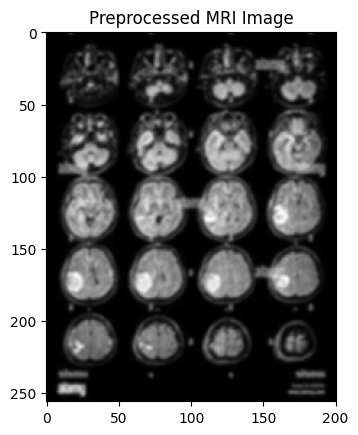

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load MRI image
image = cv2.imread("/content/brain mri.jpeg", cv2.IMREAD_GRAYSCALE)

# Normalize pixel values (0-255 → 0-1)
image = image / 255.0

# Apply Gaussian Blur to remove noise
blurred = cv2.GaussianBlur(image, (5,5), 0)

# Display processed image
plt.imshow(blurred, cmap='gray')
plt.title("Preprocessed MRI Image")
plt.show()

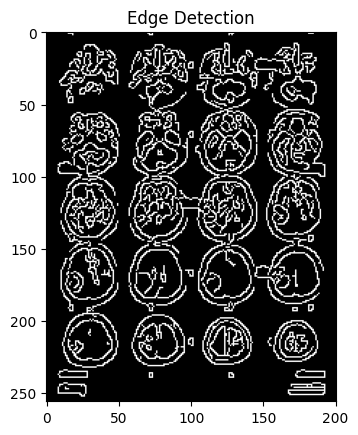

In [11]:
# Apply Canny Edge Detection
edges = cv2.Canny((blurred * 255).astype(np.uint8), 50, 150)

plt.imshow(edges, cmap='gray')
plt.title("Edge Detection")
plt.show()

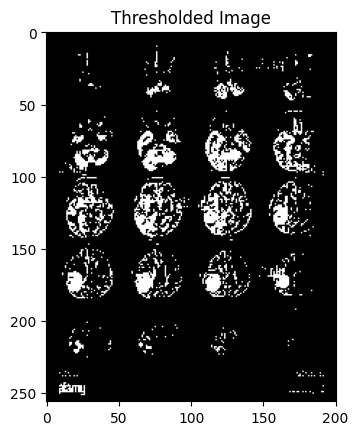

In [12]:
_, thresholded = cv2.threshold(image, 0.6, 1, cv2.THRESH_BINARY)

plt.imshow(thresholded, cmap='gray')
plt.title("Thresholded Image")
plt.show()

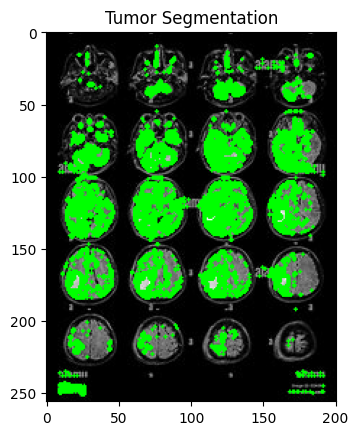

In [13]:
# Find contours
contours, _ = cv2.findContours((thresholded * 255).astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours
image_contour = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_GRAY2BGR)
cv2.drawContours(image_contour, contours, -1, (0,255,0), 2)

plt.imshow(image_contour)
plt.title("Tumor Segmentation")
plt.show()

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (Tumor / No Tumor)
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,391,873 (28.20 MB)

 Trainable params: 7,391,873 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Load dataset
#X_train, y_train = ...  # Load MRI images & corresponding tumor labels
import numpy as np # Import numpy for array creation

# Example data (replace with your actual dataset loading)
X_train = np.random.rand(100, 128, 128, 1)  # 100 images, 128x128, 1 channel (grayscale)
y_train = np.random.randint(0, 2, 100)  # 100 labels (0 or 1)


# Train model
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Evaluate model
accuracy = model.evaluate(X_train, y_train)[1]
print("Model Accuracy:", accuracy)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 889ms/step - accuracy: 0.4930 - loss: 2.6385 - val_accuracy: 0.3500 - val_loss: 1.2219
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 807ms/step - accuracy: 0.3953 - loss: 1.0363 - val_accuracy: 0.6500 - val_loss: 0.6654
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 806ms/step - accuracy: 0.6086 - loss: 0.6770 - val_accuracy: 0.6500 - val_loss: 0.6512
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6164 - loss: 0.6603 - val_accuracy: 0.6500 - val_loss: 0.6663
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 684ms/step - accuracy: 0.5891 - loss: 0.6680 - val_accuracy: 0.6500 - val_loss: 0.6657
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 817ms/step - accuracy: 0.5891 - loss: 0.6548 - val_accuracy: 0.6500 - val_loss: 0.6486
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 719ms/step - accuracy: 0.6164 - loss: 0.6438 - val_accuracy: 0.6500 - val_loss: 0.6536
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 775ms/step - accuracy: 0.6086 - loss: 0.6352 - val_accuracy: 0.6500 - val_loss: 0.